# Edge detection - Sobel, Lacplacian, Canny

In [1]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

## Read in the image

In [4]:
filepath = os.path.join('..', '..', '..', 'CDS-VIS', 'img', 'coins.png')
image = cv2.imread(filepath)
jimshow(image)

__Convert to greyscale__

In [6]:
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

__Display the image__

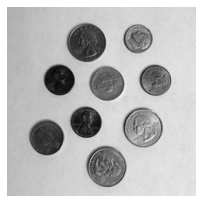

In [8]:
jimshow_channel(grey) # a single color channel

## Sobel operators

In [9]:
# horizontal sobel, moving along the x-axis
sobelx = cv2.Sobel(grey, cv2.CV_64F, 1, 0) # the values 1, 0 are specifying that we want vertical edges

sobely = cv2.Sobel(grey, cv2.CV_64F, 0, 1) # vertical sobel, horizontal edges

We have mainly used 8-bit unsigned integers. Why are we using a 64-bit float now?

Transitioning from black-to-white is considered a positive slope, whereas a transition from white-to-black is a negative slope. 

If you don’t use a floating point data type when computing the gradient magnitude, you will miss edges, specifically the white-to-black transitions.

In order to ensure you catch all edges, use a floating point data type, then take the absolute value of the gradient image and convert it back to an 8-bit unsigned integer.

In [15]:
# convert back to 8-bit unsigned integers
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))

__Compare kernel outputs__

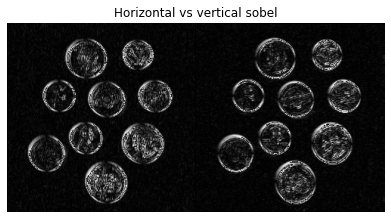

In [19]:
stacked = np.hstack([sobelx, sobely])
jimshow_channel(stacked, 'Horizontal vs vertical sobel')

## Combined Sobel

In order to combine the gradient images in both the x and y direction, we can apply a bitwise OR. 

Remember, an OR operation is true when either pixel is greater than zero. 

Therefore, a given pixel will be ```True``` if either a horizontal or vertical edge is present.

In [20]:
sobel_comb = cv2.bitwise_or(sobelx, sobely)

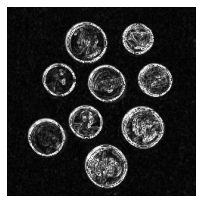

In [21]:
jimshow_channel(sobel_comb)

## Laplacian

Laplacian operator returns a single gradient, no need to perform two passes.

In [23]:
laplace = cv2.Laplacian(grey, cv2.CV_64F)

In [24]:
laplace = np.uint8(np.absolute(laplace))

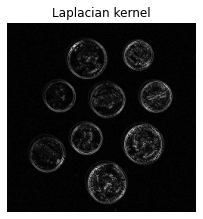

In [27]:
jimshow_channel(laplace, 'Laplacian kernel')

__Perform Canny__

In [28]:
blurred = cv2.GaussianBlur(grey, (5,5), 0) # kernel size is 5x5

Manually setting upper and lower bounds.

For one way to set thresholds automatically, consider this website:

https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/

In [44]:
canny = cv2.Canny(blurred, 30, 150) # anything below 30 is disregarded as edge, anything above is automatically an edge. anything between is an edge if it is connected to something above. 

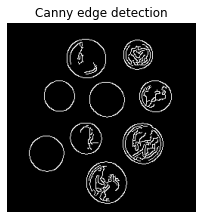

In [45]:
jimshow_channel(canny, 'Canny edge detection')

## Find contours

There are three arguments in cv2.findContours() function.

```cv2.findContours(image, contour_retrieval_mode, contour_approximation_method)```

And it outputs the image, contours and hierarchy. ```contours``` is a Python list of all the contours in the image. 

Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html

In [46]:
contours, _ = cv2.findContours(canny.copy(), 
                              cv2.RETR_EXTERNAL, # corresponds to the hierarchy, we want the most external contour (the coin, but nothing in the coin)
                              cv2.CHAIN_APPROX_SIMPLE) # approximate contour

## Draw contours

```cv2.drawContours(image, contours, fill, colour, thickness)```

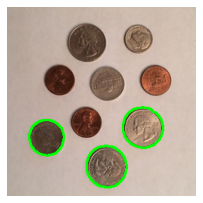

In [77]:
jimshow(cv2.drawContours(image.copy(),
                         contours[0:3], # the contours we just created above
                         -1, # writing -1 draws all coins, whereas 0 takes the first coin and so forth up to 8 (9 total)
                         (0, 255, 0), # green
                         2)) 

## Counting coins

What kind of object is the contour object ```cnts```?

In [78]:
len(contours) # so there are 9 tuples in the contours object

9

In [69]:
print('i have found', len(contours), 'coins in the image')

i have found 9 coins in the image


## Testing on other images

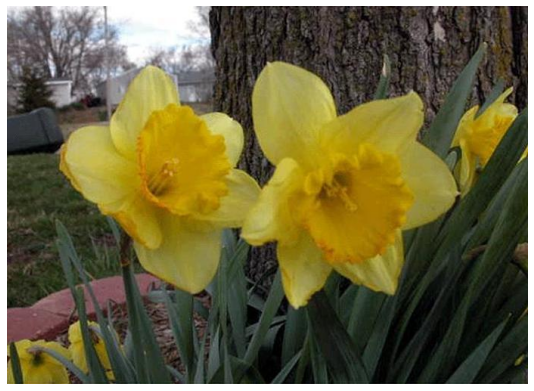

In [99]:
filepath = os.path.join('..', '..', '..', 'CDS-VIS', 'flowers', 'image_0001.jpg')
image = cv2.imread(filepath)
jimshow(image)

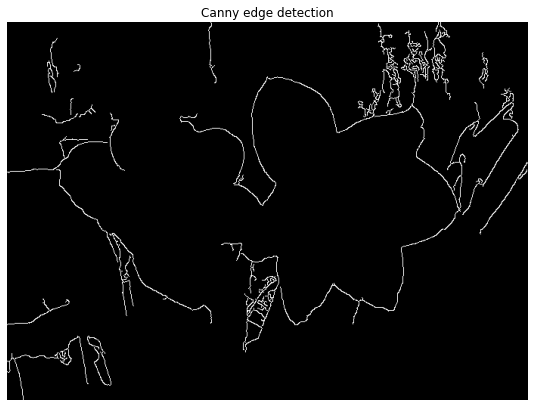

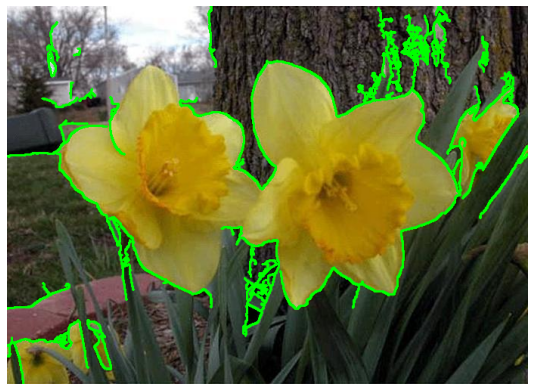

27


In [103]:
plot_contours(image)

In [102]:
def plot_contours(image):
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(grey, (5,5), 0) # kernel size is 5x5
    canny = cv2.Canny(blurred, 30, 300) # decide the values manually?
    jimshow_channel(canny, 'Canny edge detection')

    contours, _ = cv2.findContours(canny.copy(), 
                                  cv2.RETR_EXTERNAL, # corresponds to the hierarchy, we want the most external contour (the coin, but nothing in the coin)
                                  cv2.CHAIN_APPROX_SIMPLE) # approximate contour

    jimshow(cv2.drawContours(image.copy(),
                             contours, # the contours we just created above
                             -1, # writing -1 draws all coins, whereas 0 takes the first coin and so forth up to 8 (9 total)
                             (0, 255, 0), # green
                             2)) 
    print(len(contours))

In [ ]:
contours, _ = cv2.findContours(canny.copy(), 
                              cv2.RETR_EXTERNAL, # corresponds to the hierarchy, we want the most external contour (the coin, but nothing in the coin)
                              cv2.CHAIN_APPROX_SIMPLE) # approximate contour

In [ ]:
jimshow(cv2.drawContours(image.copy(),
                         contours[0:3], # the contours we just created above
                         -1, # writing -1 draws all coins, whereas 0 takes the first coin and so forth up to 8 (9 total)
                         (0, 255, 0), # green
                         2)) 

len(contours) # so there are 9 tuples in the contours object